In [1]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [2]:
import numpy as np
from sklearn import preprocessing

# 將年齡的空值填入年齡的中位數
age_median = np.nanmedian(titanic["Age"])
new_age = np.where(titanic["Age"].isnull(),
           age_median, titanic["Age"])
titanic["Age"] = new_age
# 轉換欄位值成為數值
label_encoder = preprocessing.LabelEncoder()
encoded_class = label_encoder.fit_transform(titanic["Pclass"])
encoded_Sex = label_encoder.fit_transform(titanic["Sex"])

In [3]:
from sklearn import linear_model

X = pd.DataFrame([encoded_class,
          encoded_Sex,
          titanic["Age"]]).T
y = titanic["Survived"]

logistic = linear_model.LogisticRegression()
logistic.fit(X, y)
print("迴歸係數:", logistic.coef_)
print("截距:", logistic.intercept_ )

preds = logistic.predict(X)
print('confusion matrix')
print(pd.crosstab(preds, titanic["Survived"]))
print('accuracy')
print(logistic.score(X, y))

迴歸係數: [[-1.14122733 -2.51959363 -0.03271564]]
截距: [3.44384094]
confusion matrix
Survived    0    1
row_0             
0         454   94
1          95  248
accuracy
0.7878787878787878


In [4]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y, preds)
print(cm)

[[454  95]
 [ 94 248]]


0.7878787878787878 accuracy
0.7230320699708455 precision

0.7251461988304093 recall

0.724087591240876 f1 score

0.7760521522385198 AUC


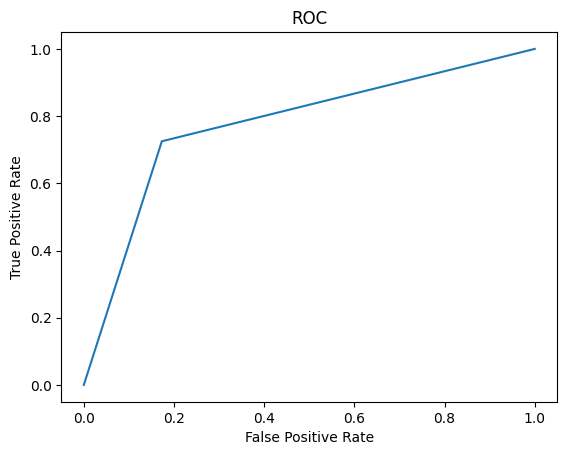

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y, preds)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
print(accuracy_score(y,preds),"accuracy")
print(precision_score(y,preds),"precision")
print()
print(recall_score(y,preds),"recall")
print()
print(f1_score(y,preds),"f1 score")
print()
from sklearn.metrics import roc_curve, auc
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc,"AUC")